# Research Bazaar - UW Madison, 2024

## Getting Started with Python for Analyzing Large Climate and Satellite Data

### Instructors:

- Hamid Dashti (dashtiahanga@wisc.edu)
- Hangkai You
- Fujiang Ji
- Min Chen


### Commands

- `Shift` + `Enter`: Run and move to the next cell.
- `Ctrl` + `Enter`: Run the cell in place.
- `Alt` + `Enter`: Run and insert a new cell below.
- To delete a cell: Press `esc` to enter command mode, then press `cmd`+`m`+`d`.
- To insert a new cell below: Press `esc` then `b`.
- To insert a new cell above: Press `esc` then `a`.


## Topics

**First Half:**

- **Introduction to xarray:**
  - Data exploration
  - Indexing
  - Basic calculations
- **Visualizing data with xarray:**
  - Static plots
  - Interactive plotting

**Second Half:**

- **Scaling computations with Dask:**
  - Handling out-of-memory (large) datasets
  - Parallel programming
- **Accessing Cloud-Based Data Catalogs:**
  - Searching Earth Engine and Planetary Computer data (explore a STAC Catalog)
  - Integrating cloud data into xarray workflows

If time allows:

- **Running Dask on HPC/HTC (Requires CHTC accounts):**
  - Setting up Dask on UW HPC using vscode


# **Geospatial Data Formats for Climate and Satellite Data**

## Key Formats

Common geospatial file formats frequently used for climate and satellite data:

### NetCDF (Network Common Data Form; <u>Our focus today</u>)

**Purpose:**

- Storing and sharing multidimensional scientific array-based data with comprehensive metadata.

**Key Features:**

- Self-describing with rich metadata for efficient algorithm development.
- Scalable for efficient access to subsets of large datasets, even remotely.
- Appendable for data addition without structure redefinition.
- Sharable with support for multi-user access.

**Common Applications:**

- Gridded climate data
- Satellite images
- Earth system model outputs

**CF Conventions (Climate and Forecast):**

- Standardized metadata for self-description and interoperability.
- Ensures variables have associated descriptions, physical units, and spatiotemporal coordinates.
- Enables software tools to work effectively with minimal user intervention.

**Links:**

- [NetCDF Website](https://www.unidata.ucar.edu/software/netcdf/)
- [CF Conventions](http://cfconventions.org/)

### HDF5 (Hierarchical Data Format version 5)

**Purpose:**

- Storing complex heterogeneous datasets.

**Key Features:**

- Hierarchical data organization with groups and datasets.
- Self-describing with metadata within the file.
- Multiple data type support (integers, floats, strings, complex numbers).
- Chunking and compression for efficient storage and access.
- Large file and dataset support (terabytes to petabytes).
- Parallel processing capabilities.

**Common Applications:**

- Many satellite data (e.g. MODIS) is HDF5.
- Earth system model outputs.

**Links:**

- [HDF5 Website](https://www.hdfgroup.org/solutions/hdf5/)

### Zarr

**Purpose:**

- Efficient parallel processing and cloud storage of large datasets.

**Key Features:**

- Stores data in chunks across multiple files. Makes reading and writing large datasets faster.
- Optimized for high-performance computing (HPC), high-throughput computing (HTC), and cloud environments.

**Common Applications:**

- Large-scale scientific datasets
- Cloud-based data analysis

**Links:**

- [Zarr Website](https://zarr.dev/)

### STAC (SpatioTemporal Asset Catalog)

**Purpose:**:

- Simplify search and discovery of geospatial data across different providers and platforms.
- Enable interoperability between various tools and applications working with geospatial data.
- Facilitate easier cloud storage and access for large datasets.

**Key Features:**

- Uses JSON files to describe assets, providing information like location, time, data type, metadata, and availability.
- Flexible and extensible, allowing customization for specific data types and needs.

**Links:**

- [STAC Website](https://stacspec.org/en)


## Basics of Xarray


### 1. Download Data

We are going to download the monthly mean of air (2m) temprature from 1948/01-2023/12.

The data is provided by [NOAA Physical Sciences Laboratory](https://psl.noaa.gov/data/gridded/), the GHCN CAMS product (declaimer: I'm not sure how good or bad this data is, our purpose is just learning handling such a file).


Import libraries:


In [111]:
# import libraries
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

Download data, it may take less than a minute. Let me know if its more than that, I can hand it to you by USB.


In [114]:
# Download the data
url = f"https://downloads.psl.noaa.gov/Datasets/ghcncams/air.mon.mean.nc"
savename = url.split("/")[-1]
urllib.request.urlretrieve(url, savename)

('air.mon.mean.nc', <http.client.HTTPMessage at 0x7f772d738f70>)

### [Xarray](https://docs.xarray.dev/en/stable/): Handling NetCDF

Xarray introduces labels in the form of dimensions, coordinates and attributes on top of raw NumPy-like multidimensional arrays.

Most scientific data are multidimensional arrays. We can add labels to this matrices so we can make them easier to work with.

The [Pandas](https://pandas.pydata.org/) is a powerful Python package for this purpose but its limitted to 2-dimensional (e.g. tablular) data.

You can think of xarray as a generalized version of Pandas that can handle n-dimensional data.

With Xarray, we can read, write and process netcdf files.

![Dataset Diagram](./dataset-diagram.webp)

Some key terminology:

- **DataArray**: A labeled multi-dimensional array.
- **Dataset**: A collection of DataArray objects.
- **Variable**: A NetCDF-like variable consisting of dimensions, data, and attributes which describe a single array.
- **Dimension**: The name of the axis of the data. E.g. in math we say 'x' dimension to describe values on x axis, in climate data we can say 'time' dimension to describe that data has a temporal aspect.
- **Coordinates**: An array that labels a dimension or set of dimensions of another DataArray. E.g. for 'x' axis in math we have (0,1,2,...), similarly we can have labels for the latitude dimension.


## 2. Open the data and explore


In [118]:
# Open the air temprature Dataset
ds = xr.open_dataset(savename)
ds

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 912)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2023-12-01
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    title:          NOAA/NCEP GHCN CAMS Monthly Temperature
    Conventions:    CF-1.0
    Source:         http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP/.CPC/....
    version:        3.01
    history:        created 8/2012 by CAS NOAA/ESRL PSDupdated to include maj...
    dataset_title:  Climate Prediction Center (CPC) Global Land Surface Air T...
    References:     https://www.psl.noaa.gov/data/gridded/data.ghcncams.html

Extract the air temperature data


In [120]:
# Extract the air temprature DataArray
ta = ds["air"]
ta

<xarray.DataArray 'air' (time: 912, lat: 360, lon: 720)>
[236390400 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2023-12-01
Attributes:
    long_name:      Monthly mean of surface temperature
    units:          degK
    dataset:        NOAA/NCEP GHCN CAMS
    var_desc:       Air Temperature
    level_desc:     Surface
    statistic:      Mean
    parent_stat:    Other
    standard_name:  air_temperature
    cell_methods:   time: mean
    valid_range:    [150. 400.]
    actual_range:   [-49.21874 335.75   ]

If we already know that there is only one variable in the dataset, we can use the shortcut to load the data using `xr.open_dataarray()`.


In [123]:
ta = xr.open_dataarray(savename)
ta

<xarray.DataArray 'air' (time: 912, lat: 360, lon: 720)>
[236390400 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2023-12-01
Attributes:
    long_name:      Monthly mean of surface temperature
    units:          degK
    dataset:        NOAA/NCEP GHCN CAMS
    var_desc:       Air Temperature
    level_desc:     Surface
    statistic:      Mean
    parent_stat:    Other
    standard_name:  air_temperature
    cell_methods:   time: mean
    valid_range:    [150. 400.]
    actual_range:   [-49.21874 335.75   ]

Extract the values of the air temprature DataArray as numpy array


In [129]:
# ta.values
data = ta.data
print(data)
print(data.shape)

[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 ...

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan n

Get dimensions names. Note its only names.


In [130]:
ta.dims

('time', 'lat', 'lon')

Get the coordinates. Note these are array of labels (lat/lon values, timestamps).


In [131]:
ta.coords

Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2023-12-01

you can extract the time, latitude, and longitude coordinates as follows:


In [136]:
ta.coords["time"]

<xarray.DataArray 'time' (time: 912)>
array(['1948-01-01T00:00:00.000000000', '1948-02-01T00:00:00.000000000',
       '1948-03-01T00:00:00.000000000', ..., '2023-10-01T00:00:00.000000000',
       '2023-11-01T00:00:00.000000000', '2023-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2023-12-01
Attributes:
    long_name:           Time
    delta_t:             0000-01-00 00:00:00
    avg_period:          0000-01-00 00:00:00
    axis:                T
    standard_name:       time
    coordinate_defines:  start
    actual_range:        [1297320. 1962792.]

Get the metadata (attribute):


In [143]:
ta.attrs
# Similar to coordinates, you can access the attributes of a DataArray using the .attrs[""]:
# print(ta.attrs['units'])

{'long_name': 'Monthly mean of surface temperature',
 'units': 'degK',
 'dataset': 'NOAA/NCEP GHCN CAMS',
 'var_desc': 'Air Temperature',
 'level_desc': 'Surface',
 'statistic': 'Mean',
 'parent_stat': 'Other',
 'standard_name': 'air_temperature',
 'cell_methods': 'time: mean',
 'valid_range': array([150., 400.], dtype=float32),
 'actual_range': array([-49.21874, 335.75   ], dtype=float32)}

Many functions used in numpy can be used here as well:


In [137]:
# For example get the shape of the data
ta.shape

(912, 360, 720)

### Indexing and selecting data and simple plotting

Labeling data (as xarray does) make indexing and selecting data very flexible and intuitive. We can index data based on position or labels.


index like python standard method `[]`:


In [145]:
# For example index data at the first time step and all latitudes and longitudes.
ta[0, :, :]

<xarray.DataArray 'air' (lat: 360, lon: 720)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
    time     datetime64[ns] 1948-01-01
Attributes:
    long_name:      Monthly mean of surface temperature
    units:          degK
    dataset:        NOAA/NCEP GHCN CAMS
    var_desc:       Air Temperature
    level_desc:     Surface
    statistic:      Mean
    parent_stat:    Other
    standard_name:  air_temperature
    cell_methods:   time: mean
    valid_range:    [150. 400.]
    actual_range:   [-49.21874 335.75   ]

Save NetCDF files to the disk using `to_netcdf()`


In [14]:
ta.to_netcdf("ta.nc")

**Quick Practice: Index Data Inclusive of the Upper Hemisphere for Time=100, plot it and Save to Disk**

_Hint: Utilize functions like `range()` or `np.arange()` for efficient indexing. For plotting extract data using `.values` and plot it using `plt.imshow()`_

_Bonus: If you have other software, such as QGIS, installed on your computer, try opening the exported file to explore its contents._


In [146]:
# Your codes here

Solution:


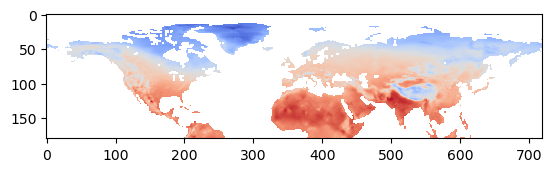

In [198]:
# first find what is the index for latitude from 0 to 90
# print(ta.coords["lat"][0:180])
upper_hemsphere = ta[100, 0:180, :]
plt.imshow(upper_hemsphere.values, cmap="coolwarm")

Index with dimension names using `isel()` and `sel` methods. Much more intuitive!

- `isel()` is integer-based selection much like `iloc()` in `pandas` or python's `[]`.
- `sel()` is label-based selection like `'loc()` in pandas.


In [170]:
# you can do same thing along lat and lon dimensions
data_isel = ta.isel(time=range(0, 12))
data_isel

<xarray.DataArray 'air' (time: 12, lat: 360, lon: 720)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 1948-12-01
Attributes:
    long_name:      Monthly mean of surface temperature
    units:          degK
    dataset:        NOAA/NCEP GHCN CAMS
    var_desc:       Air Temperature
    level_desc:     Surface
    statistic:      Mean
    parent_stat:    Other
    standard_name:  air_temperature
    cell_methods:   time: mean
    valid_range:    [150. 400.]
    actual_range:   [-49.21874 335.75   ]

In [172]:
data_sel = ta.sel(time=["2023-08-01", "2023-09-01"])
data_sel

<xarray.DataArray 'air' (time: 2, lat: 360, lon: 720)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 2023-08-01 2023-09-01
Attributes:
    long_name:      Monthly mean of surface temperature
    units:          degK
    dataset:        NOAA/NCEP GHCN CAMS
    var_desc:       Air Temperature
    level_desc:     Surface
    statistic:      Mean
    parent_stat:    Other
    standard_name:  air_temperature
    cell_methods:   time: mean
    valid_range:    [150. 400.]
    actual_range:   [-49.21874 335.75   ]

You can select a range of labels:


In [175]:
ta.sel(time=slice("1984-01-01", "1984-12-01"))

<xarray.DataArray 'air' (time: 12, lat: 360, lon: 720)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 1984-01-01 1984-02-01 ... 1984-12-01
Attributes:
    long_name:      Monthly mean of surface temperature
    units:          degK
    dataset:        NOAA/NCEP GHCN CAMS
    var_desc:       Air Temperature
    level_desc:     Surface
    statistic:      Mean
    parent_stat:    Other
    standard_name:  air_temperature
    cell_methods:   time: mean
    valid_range:    [150. 400.]
    actual_range:   [-49.21874 335.75   ]

Nearest neighbor selection. Sometime we don' know the exact index (e.g. latitude), so we use nearest neighbor method.


Example: Here we want find closes air temperature to a specific lat and lon.

But the longitude of this file starts from 0 on its most left to 360 on its most right. Lets make it from -180 to 180.


In [179]:
# fixing longitude
# We will soon see more on basic calculations like below:
ta.coords["lon"] = (ta.coords["lon"] + 180) % 360 - 180
ta = ta.sortby(ta.lon)

Now find the nearest neighbor


<xarray.DataArray 'air' (time: 912)>
array([261.12   , 261.77   , 272.3    , ..., 283.2103 , 273.96625, 265.17413],
      dtype=float32)
Coordinates:
    lat      float32 43.25
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2023-12-01
    lon      float32 89.25
Attributes:
    long_name:      Monthly mean of surface temperature
    units:          degK
    dataset:        NOAA/NCEP GHCN CAMS
    var_desc:       Air Temperature
    level_desc:     Surface
    statistic:      Mean
    parent_stat:    Other
    standard_name:  air_temperature
    cell_methods:   time: mean
    valid_range:    [150. 400.]
    actual_range:   [-49.21874 335.75   ]

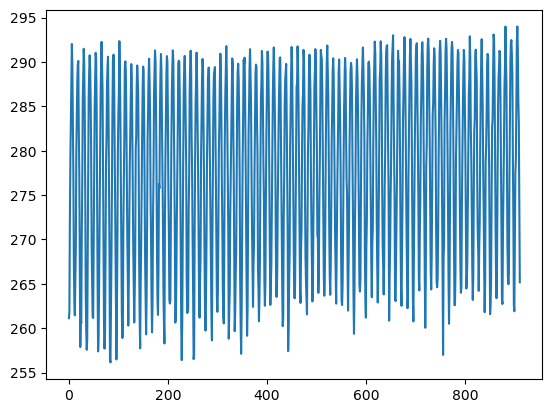

In [188]:
nearest_neighbor = ta.sel(lat=43, lon=89, method="nearest")
plt.plot(nearest_neighbor.values, "-")
nearest_neighbor

## Create Mask with `where()`

The `where()` can come handy in many many situations.

For example, we can tell where in the world temperature was above/below a certain degree, create masks, find missing data and many other applications.


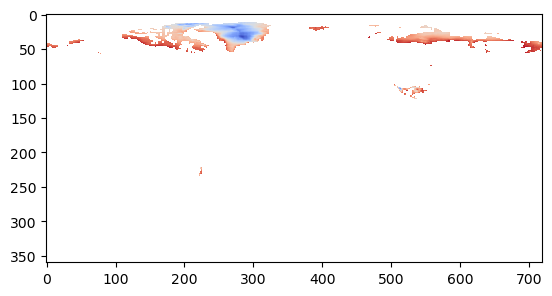

In [197]:
da = ta.sel(time="2023-05-01")
da_cold = da.where(da < 273.15)
plt.imshow(da_cold.values, cmap="coolwarm")

We can replace the masked regions and replace it with desired data.

In the code below we say find grids where temp is less than 273.15 K and replace them with temp=500 K (just because we can!), and for other region keep the original value.


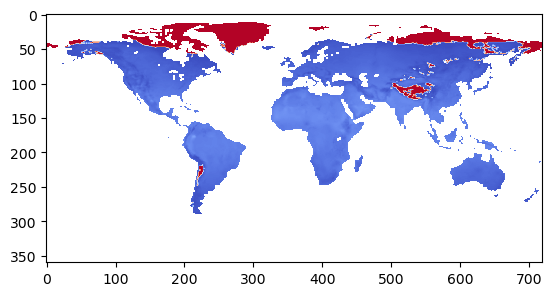

In [206]:
# Replace the below zero values with 100 (just for the sake of example)
da_hot = xr.where(da < 273.15, 500, da)
plt.imshow(da_hot.values, cmap="coolwarm")

We can replace it with other DataArrays...


In [208]:
da_tmp = xr.where(da_c < 273.15, ta.sel(time="1985-08-01"), da)

## 3. Plotting


### One dimensional plot


We can simply use the `plot()` method to plot the data.


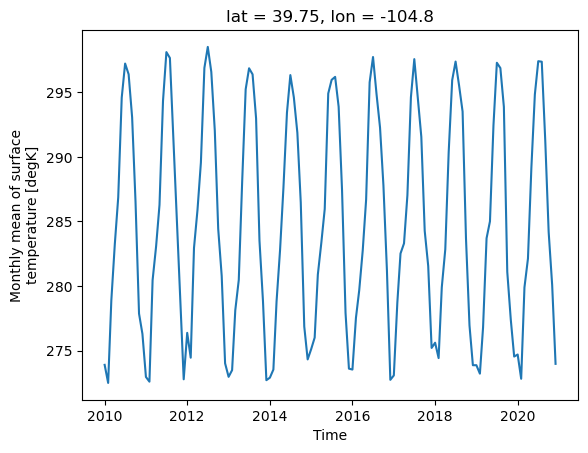

In [209]:
ta.sel(time=slice("2010-01-01", "2020-12-31")).isel(lat=100, lon=150).plot()

xarray under the hood used the `matplotlib` library. Any argument that goes into matplotlib can be passed to xarray


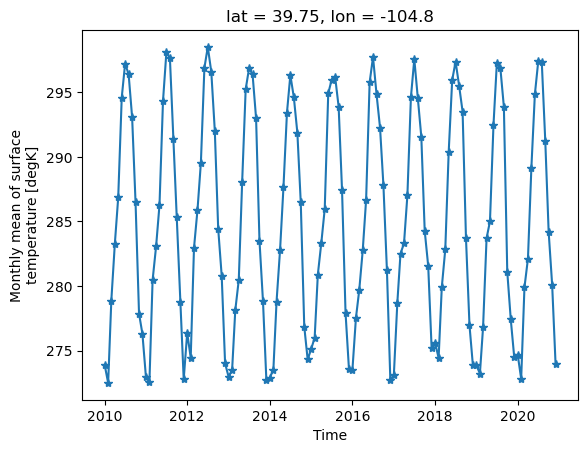

In [210]:
ta.sel(time=slice("2010-01-01", "2020-12-31")).isel(lat=100, lon=150).plot.line("-*")

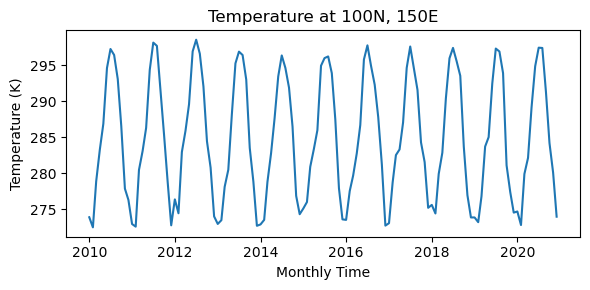

In [211]:
ta.sel(time=slice("2010-01-01", "2020-12-31")).isel(lat=100, lon=150).plot(
    aspect=2, size=3
)
plt.title("Temperature at 100N, 150E")
plt.xlabel("Monthly Time")
plt.ylabel("Temperature (K)")
plt.tight_layout()

### Two dimensional plots


xarray is smart enough that in many cases it can interpret your data and choose an appropriate type.


Text(0, 0.5, 'Latitude')

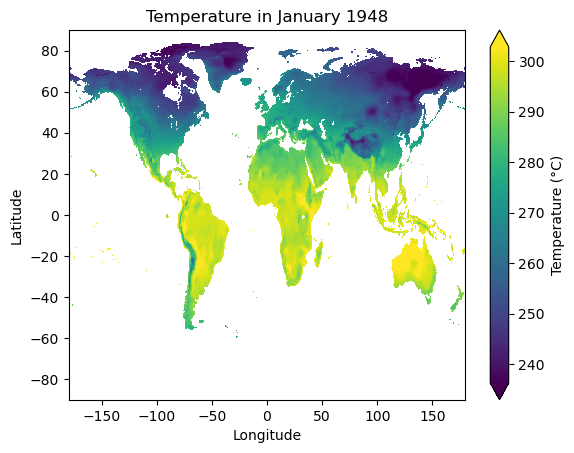

In [213]:
ta.isel(time=0).plot(robust=True, cbar_kwargs={"label": "Temperature (°C)"})
plt.title("Temperature in January 1948")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

### Faceting

Its handy when we want to plot multiple plots along a dimension (e.g. time)


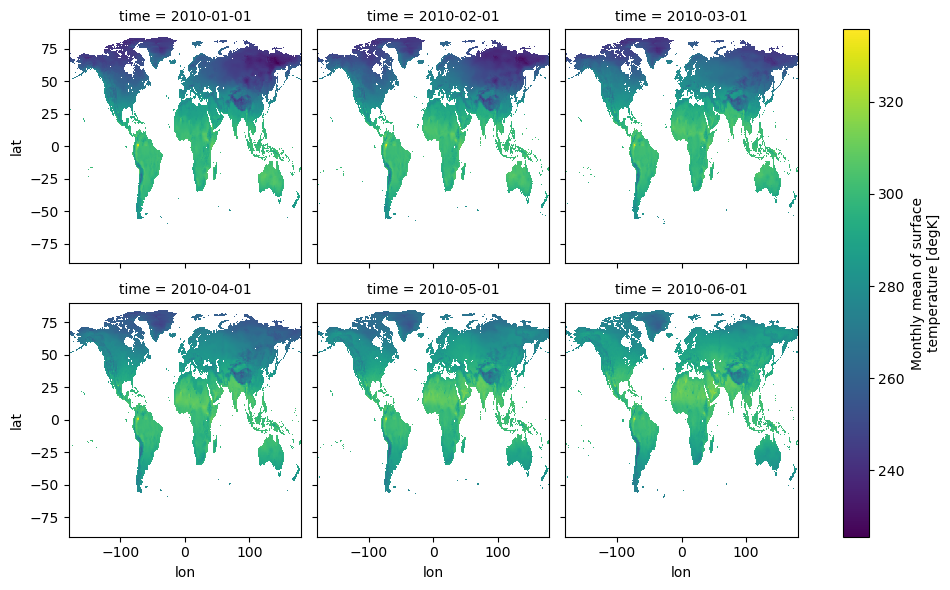

In [218]:
ta_sub = ta.sel(time=slice("2010-01-01", "2010-06-30"))
ta_sub.plot(col="time", col_wrap=3)

### More advanced plots


In general the xarray basic plotting is great for data exploration (quick test).

However, it other more plotting packages were integrated with xarray to produce more complicated plots.


For example code below is how to plot it in various projections, adding coastlines etc.


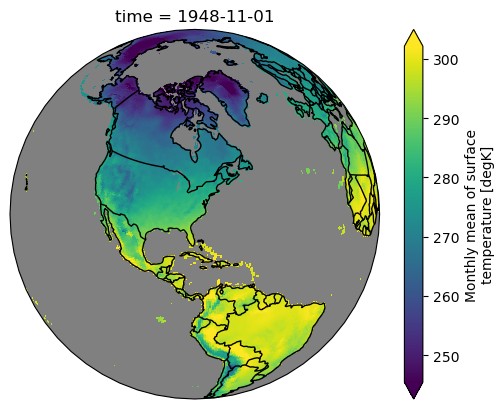

In [226]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

p = ta.isel(time=10).plot(
    subplot_kws=dict(projection=ccrs.Orthographic(-80, 35), facecolor="gray"),
    transform=ccrs.PlateCarree(),
    robust=True,
)

p.axes.coastlines()
p.axes.add_feature(cfeature.BORDERS)

Different projections


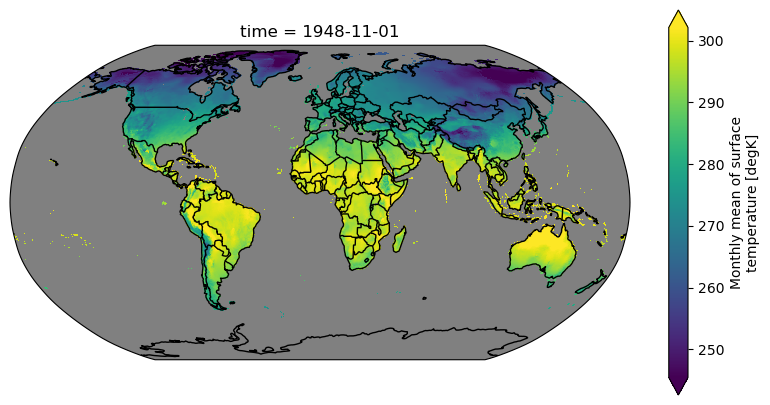

In [228]:
p = ta.isel(time=10).plot(
    subplot_kws=dict(projection=ccrs.Robinson(), facecolor="gray"),
    figsize=(10, 5),
    transform=ccrs.PlateCarree(),
    robust=True,
)

p.axes.coastlines()
p.axes.add_feature(cfeature.BORDERS)

### Interactive plotting


In [241]:
import hvplot.xarray

ta.isel(time=10).hvplot(
    width=800,
    height=400,
    cmap="fire",
    projection=ccrs.Mollweide(),
)

:Image   [lon,lat]   (air)

In [245]:
ta.isel(time=range(12)).hvplot(
    width=800,
    height=400,
    cmap="fire",
    # projection=ccrs.Orthographic(-90, 30),
    coastline=True,
    groupby="time",
    widget_type="scrubber",
    widget_location="bottom",
)

BokehModel(combine_events=True, render_bundle={'docs_json': {'773ad057-4864-4f4d-8995-cc86e999da24': {'version…

## 4. Computations


Xarray integrates seamlessly with NumPy, allowing you to apply many familiar NumPy functions directly to xarray objects (DataArrays and Datasets) while preserving their labeled structure and coordinates.


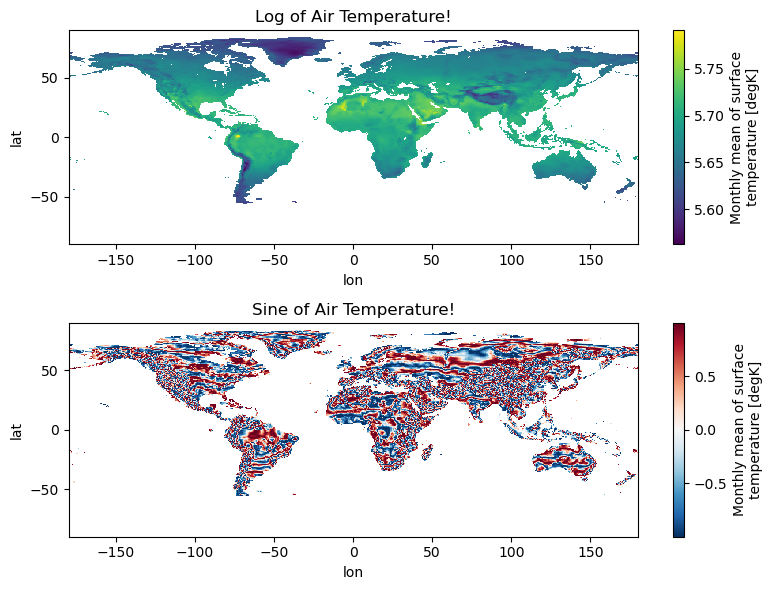

In [256]:
# For example let calculate log and sin of the air temprature, whatever they mean!
ta_sel = ta.sel(time="2023-08-01")

log_ta = np.log(ta_sel)
sin_ta = np.sin(ta_sel)

fig, axes = plt.subplots(2, 1, figsize=(8, 6))
log_ta.plot(ax=axes[0])
sin_ta.plot(ax=axes[1])

axes[0].set_title("Log of Air Temperature!")
axes[1].set_title("Sine of Air Temperature!")
plt.tight_layout()

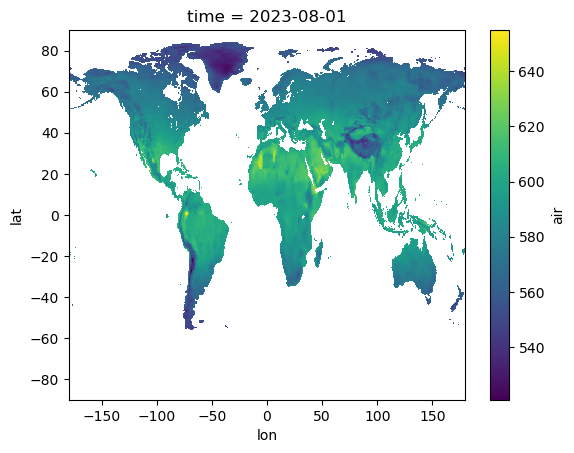

In [24]:
# Operation on two DataArrays
ta_sum = ta_sel + ta_sel
ta_sum.plot()

we can use `isnull()`, `notnull()`, `fillna()`, `dropna()` and a few more to deal with missing data


Plot grids where it is `NaN` and its not `NaN`


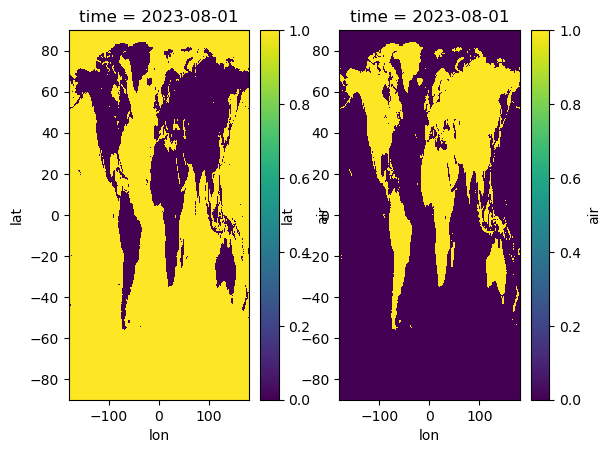

In [261]:
plt.subplot(1, 2, 1)
ta_sel.isnull().plot()
plt.subplot(1, 2, 2)
ta_sel.notnull().plot()

Fill the missing values with 0


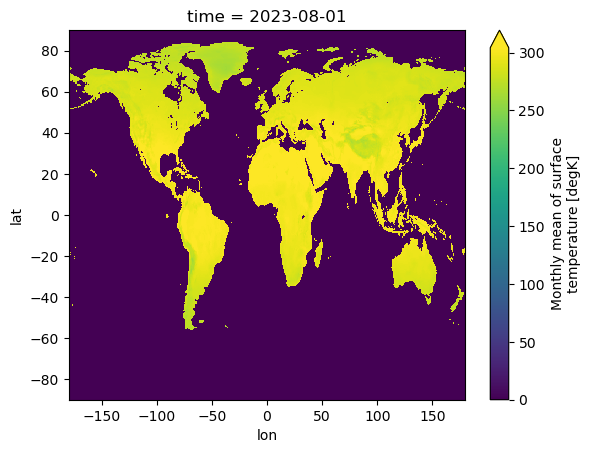

In [265]:
ta_sel.fillna(0).plot(robust=True)

Taking the mean/max/min etc.


In [266]:
ta_sel_mean = ta_sel.mean()
ta_sel_mean
# Try to sum, std, min, max, median, quantile, etc.

<xarray.DataArray 'air' ()>
array(291.9924, dtype=float32)
Coordinates:
    time     datetime64[ns] 2023-08-01

Including labels (dimensions) in our calculations.

For example we can take the mean over lat and lon dimensions to get the global mean of temperature.


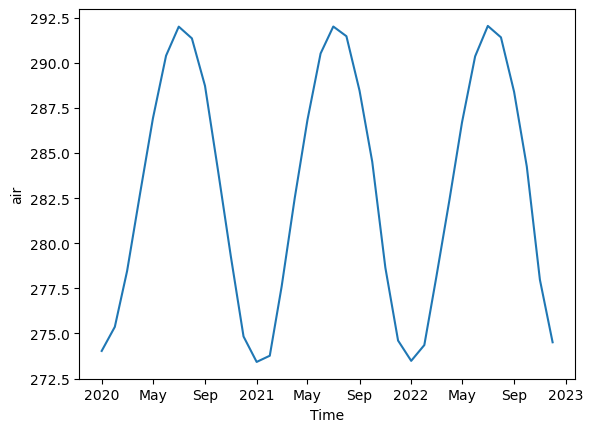

In [269]:
ta_mean = ta.mean(dim=["lat", "lon"])
ta_mean.sel(time=slice("2020-01-01", "2022-12-01")).plot()

### Practice: plot the map of global temp mean from the year 1990 to 2010


In [270]:
# Your codes here

Solution


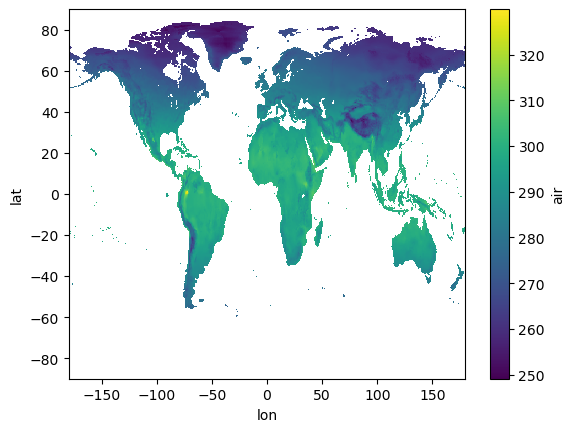

In [272]:
ta.sel(time=slice("1990-01-01", "2010-12-01")).mean(dim="time").plot()

Binning and grouping data using `groupby` and `resample`.


In [285]:
ta_group = ta.groupby("time.year").mean()
ta_resample = ta.resample(time="Y").mean()
# Notice the dimension of the DataArray is now year instead of time

**Note:**

<u>Grouping</u>:

- Uses the groupby function to group the data by the "year" component of the "time" coordinate. Each group represents a year's worth of data.
- The `mean()` function is then applied within each group, calculating the average value for each year.
- Flexibility: This method offers more flexibility if you need to perform different operations on each year's data (e.g., standard deviation, percentiles). You can iterate over the groups or apply further calculations within the groupby object.

<u>Resampling</u>:

- Uses the resample function to directly change the sampling frequency of the data to "Y" (yearly). This essentially averages all values within each year automatically.
- For simple calculations like computing averages, this approach can be more efficient because it avoids explicit grouping and iteration.
- Applying further operations on individual years requires additional steps.


Calculate moving average:


In [284]:
annual_ta = ta.groupby("time.year").mean()  # Group the data by year
window_size = 3  # Define the window size for the moving average

# # Calculate the moving average
moving_avg = annual_ta.rolling(year=window_size, center=True).mean()

moving_avg

<xarray.DataArray 'air' (year: 76, lat: 360, lon: 720)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * year     (year) int64 1948 1949 1950 1951 1952 ... 2019 2020 2021 2022 2023
Attributes:
    long_name:      Monthly mean of surface temperature
    units:          degK
    dataset:        NOAA/NCEP GHCN CAMS
    var_desc:       Air Temperature
    level_desc:     Surface
    statistic:      Mean
    parent_stat:    Other
    standard_name:  air_temperature
    cell_methods:   time: mean
    valid_range:    [150. 400.]
    actual_range:   [-49.21874 335.75   ]

In [345]:
# plot the results of moving average

# your codes here

What if we want to resample the data to a different time frequency?


In [288]:
ta_resample = ta.resample(time="5Y").mean(dim="time")
ta_resample

<xarray.DataArray 'air' (time: 16, lat: 360, lon: 720)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * time     (time) datetime64[ns] 1948-12-31 1953-12-31 ... 2023-12-31
Attributes:
    long_name:      Monthly mean of surface temperature
    units:          degK
    dataset:        NOAA/NCEP GHCN CAMS
    var_desc:       Air Temperature
    level_desc:     Surface
    statistic:      Mean
    parent_stat:    Other
    standard_name:  air_temperature
    cell_methods:   time: mean
    valid_range:    [150. 400.]
    actual_range:   [-49.21874 335.75   ]

### Apply a costume function to the data along dimension(s)

Xarray's `apply_ufunction()` is great for applying your costume functions along any dimension of your data.


Lets calculate the trend in annual temperature:


In [358]:
# define a function to compute a linear trend of a time series (we use numpy.polyfit())
def linear_trend(y):
    if np.isnan(y).any():
        return np.nan
    x = np.arange(len(y))
    pf = np.polyfit(x, y, 1)
    # need to return an xr.DataArray for groupby
    return pf[0]

In [371]:
# Calculate the annual mean
ta_annual = ta.resample(time="Y").mean()
# Calculate the linear trend
trend_result = xr.apply_ufunc(
    linear_trend,  # The function to apply (linear_trend in this case)
    ta_annual,  # The input data (ta_annual in this case)
    input_core_dims=[
        ["time"]
    ],  # Specifies the core dimensions of the input data (in this case, "time" is the core dimension)
    vectorize=True,  # Vectorize the function (apply element-wise operations)
)

Plot the trend resutls


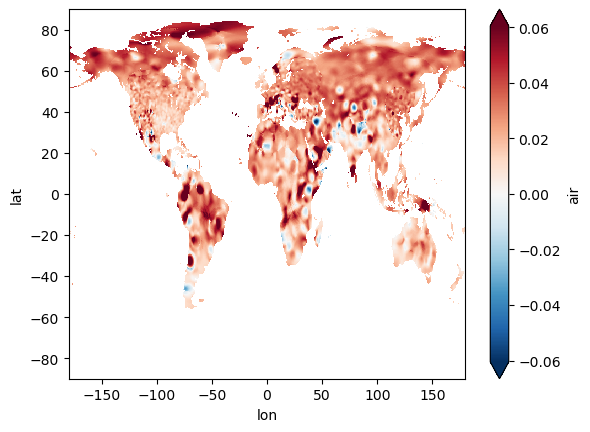

In [370]:
trend_result.plot(robust=True)

### Problem 2: Calculate the annual temperature anomaly for the entire time period and plot the anomaly for the year 2023/08

Hint:

- A simple equation of anomaly is to subtract climatological mean (long term mean) from the data.
- Calculate the mask for summer months (June, July, August): make a of ta['time.month']
- apply mask to select summer months (i.e. ta.where(mask)). \*\*Note `where()` has an argument `drop==True` which drops other months than summer.
- Calculate the climatological mean of summer temperatures (i.e. annual mean)
- Calculate anomalies by subtracting climate mean from summer temperature.
- Finally plot the anomaly of the year 2023 and the global mean (mean["lat","lon"]) for the entire time. \*\*use `matplotlib.subplot()` to plot them side-by-side.

What do you notice :(


Solution:


In [326]:
# Calculate the mask for summer months (June, July, August)
mask = (ta["time.month"] >= 6) & (ta["time.month"] <= 8)

# Apply the mask to select only summer months data
ta_summer = ta.where(mask, drop=True)

# Calculate the annual mean of summer temperatures
ta_summer_annual = ta_summer.groupby("time.year").mean()

# Calculate the climatological mean of summer temperatures
clima_mean = ta_summer_annual.mean(dim="year")

# Calculate the summer temperature anomalies by subtracting the climatological mean
summer_anomalies = ta_summer_annual - clima_mean

Now plot the results


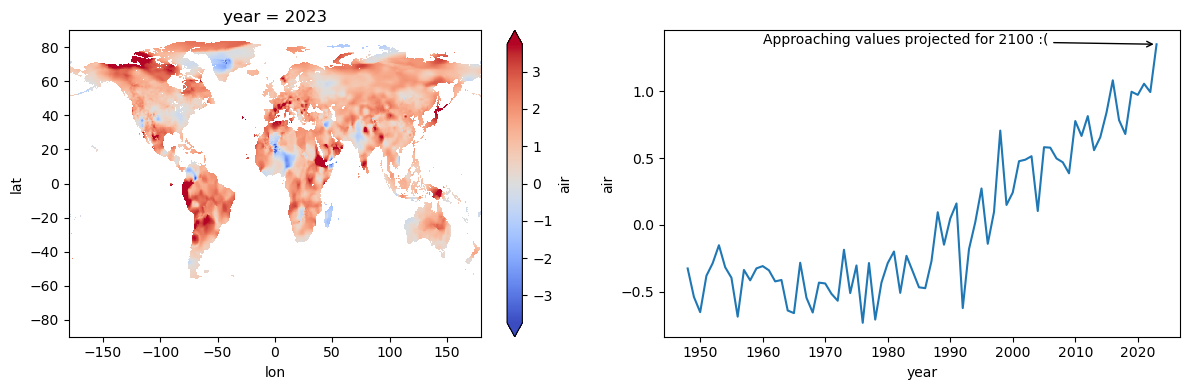

In [377]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))

# Plot the summer anomalies for the year 2023
summer_anomalies.sel(year=2023).plot(robust=True, cmap="coolwarm", ax=axs[0])

# Plot the global mean of summer temperature anomalies
summer_anomalies.mean(["lat", "lon"]).plot(ax=axs[1])

# Add an arrow pointing to the anomaly values in the year 2021
axs[1].annotate(
    "Approaching values projected for 2100 :(",
    xy=(2023, summer_anomalies.sel(year=2023).mean(["lat", "lon"])),
    xytext=(1960, summer_anomalies.sel(year=2023).mean(["lat", "lon"])),
    arrowprops=dict(facecolor="black", arrowstyle="->"),
)

plt.tight_layout()

More on 1.5 C and its importance in [IPCC report: chapter 1](https://www.ipcc.ch/sr15/chapter/chapter-1/).

P.S. To be more accurate we need to do a bit more:

- We need to take the area of cells into account when calculating the global mean.
- We need to deal with outliers.
- This dataset is one of the many, other datasets may show different results.
- And anomalies are not distributed uniformly, for example arctic is warming twice as fast the rest of the world, as we have seen it in the last trend analyses.


### Done with the Basics! Congrats!

Now, let's delve into handling more advanced challenges when processing climate data:

1. **Dealing with Large Datasets (Out-of-Memory):**

   - When your data is large and doesn't fit into memory, you need a solution.
   - `Dask` is a parallel computing library that excels at handling larger-than-memory computations.

2. **Speeding Up Computations (Parallel Computing):**
   - `Dask` allows you to parallelize computations across multiple cores or even in distributed computing environments.

In the next session, we will introduce `dask` to address these issues.
